## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
# !wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [2]:
import pandas as pd

N = 1310720   # number of rows in the 'data_000637.txt' dataset: 1310720
file_name = '/Users/Daniele/data/data_000637.txt'
data = pd.read_csv(file_name, nrows=N)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Find out the number of BX in a ORBIT (the value 'x').

In [3]:
x = data['BX_COUNTER'].max() + 1
print('Number of BX in a ORBIT:', x)

Number of BX in a ORBIT: 3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [4]:
data['TIME_NS'] = data['TDC_MEAS']*(25/30) + data['BX_COUNTER']*25 + data['ORBIT_CNT']*x*25   # creating a new column with the absolute time in ns
period = (data['TIME_NS'].max() - data['TIME_NS'].min()) * 10**(-9)   # data taking time in s
print('The data taking lasted', period, 'seconds')

The data taking lasted 0.9804162533125 seconds


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [5]:
# 'TIME_NS' column already created in the previous answer!
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME_NS
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [6]:
import numpy.random as npr
npr.seed(10)

data['HEAD'] = npr.randint(0, 2, len(data))
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME_NS
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,0,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,0,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,0,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,0,0,139,3869211171,769,0,3.447467e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [7]:
df = data[data['HEAD'] == 1]
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME_NS
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
5,1,0,63,3869200167,2762,4,3.447457e+14
6,1,0,61,3869200167,2772,14,3.447457e+14
...,...,...,...,...,...,...,...
1310705,1,0,94,3869211171,43,22,3.447467e+14
1310707,1,0,57,3869211171,137,29,3.447467e+14
1310708,1,0,124,3869211171,199,9,3.447467e+14
1310715,1,0,62,3869211171,762,14,3.447467e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

Text(0, 0.5, '# counts')

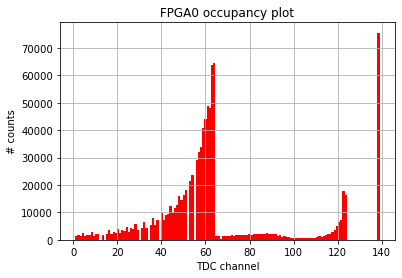

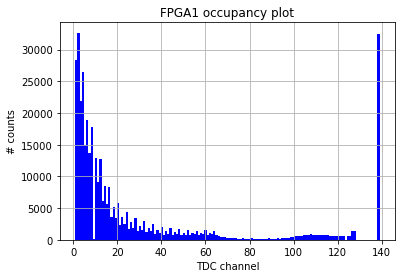

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# FPGA0 occupancy plot
fpga0 = data[data['FPGA'] == 0]
fpga0.hist(column='TDC_CHANNEL', bins=fpga0['TDC_CHANNEL'].max(), color='red')
plt.title('FPGA0 occupancy plot')
plt.xlabel('TDC channel')
plt.ylabel('# counts')

# FPGA1 occupancy plot
fpga1 = data[data['FPGA'] == 1]
fpga1.hist(column='TDC_CHANNEL', bins=fpga1['TDC_CHANNEL'].max(), color='blue')
plt.title('FPGA1 occupancy plot')
plt.xlabel('TDC channel')
plt.ylabel('# counts')

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [9]:
top = 3
noisy = data.groupby('TDC_CHANNEL').size().nlargest(top).to_frame("# COUNTS").reset_index()
print('Top %d noisiest TDC channels:' % top)
noisy

Top 3 noisiest TDC channels:


,TDC_CHANNEL,# COUNTS
0,139,108059
1,64,66020
2,63,64642


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [10]:
orbits = data.drop_duplicates('ORBIT_CNT')
print('Number of unique orbits:', len(orbits))

orbits139 = data[data['TDC_CHANNEL'] == 139].drop_duplicates('ORBIT_CNT')
print('Number of unique orbits with at least one measurement from TDC_CHANNEL=139:', len(orbits139))

Number of unique orbits: 11001
Number of unique orbits with at least one measurement from TDC_CHANNEL=139: 10976
